# 1.AUTHOR
**STUDENT NAME:** Vidhyaa Shree Rajakumar






**STUDENT ID:** 230707669

#2. Problem Definition

The problem's objective is to use image processing to determine whether the provided image of the dish is rice or chips. This problem's purpose is to evaluate the image processing process together with the extent to which the machine can accurately predict the outcome.

# 3. Machine Learning Pipeline

**Data Sampling and Processing**

From the MLEnd library, a sample of 99 dishes is downloaded to Google Drive. After that, the pictures are resized to have uniform sizes across the predictor space.

**Transformation Stage**

The cv2 library is used for the image feature extraction process. Colorfulness, average color intensity, and extracting hsv channel are the five features that were taken out of the pictures. To lessen the dimension, each resized image will be transformed into an array containing three values of the feature extracted value.

**Normalization**

Because the feature extraction values were not in the same units, standardization was necessary to get them all into a similar range of values.

**Modeling**

Since this is a binary classification problem that determines whether the image is of rice or chips, Linear SVC is the model that was selected.

**Methodology**

The five features from the resized images will be taken out and placed into an array; this array will not contain pixel values, but rather five single values, each of which will represent a feature. Next, the model makes predictions for the training and testing sets. The accuracy of the predictions is checked and the model's overfitting or underfitting is confirmed using the mean of these predictions. A confusion matrix is created to determine how well the model can predict whether the image depicts rice or chips in order to further validate its prediction.

**Results**

The Linear SVC model has the highest prediction accuracy as well as the highest true positive and true negative values, according to the confusion matrix and prediction accuracy.

**Conclusion**

This leads us to the conclusion that binary classification can be carried out using five distinct features that were taken from the images. There is still scope for improvement. For example, a larger dataset and pre-trained models like Convolutional Neural Networks could be used to extract more features for higher accuracy from the images.

# 4. Dataset
From the MLEnd library, a sample of 99 dishes is downloaded to Google Drive. The yummy_small_load function of the library is then used to divide the data into training and testing collections. Next, the pictures are loaded from Google Drive and adjusted in size so that they are all the same size. They are divided into Y_train, Y_test, X_train_f, and X_test_f arrays.

In [113]:
!pip install mlend

In [141]:
pip install --upgrade opencv-python

In [115]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp
from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski
import mlend
from mlend import download_yummy_small, yummy_small_load
import os, sys, re, pickle, glob
import urllib.request
import zipfile
import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [117]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


In [118]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)

(-0.5, 1207.5, 907.5, -0.5)

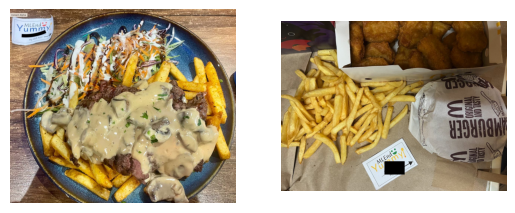

In [119]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [120]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


In [121]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [122]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [123]:
TrainSet['Y']

array(['chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'rice', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips'],
      dtype=object)

In [124]:
TrainSet['Y_encoded']

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

In [125]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

In [126]:
import cv2
import numpy as np

desired_size = (100, 100)
image_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'

def resize_and_convert_color(image_path, desired_size):
    bgr_image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(rgb_image, desired_size)
    return resized_image

X_train_resized_rgb = [resize_and_convert_color(path, desired_size) for path in X_train_paths]
X_test_resized_rgb = [resize_and_convert_color(path, desired_size) for path in X_test_paths]


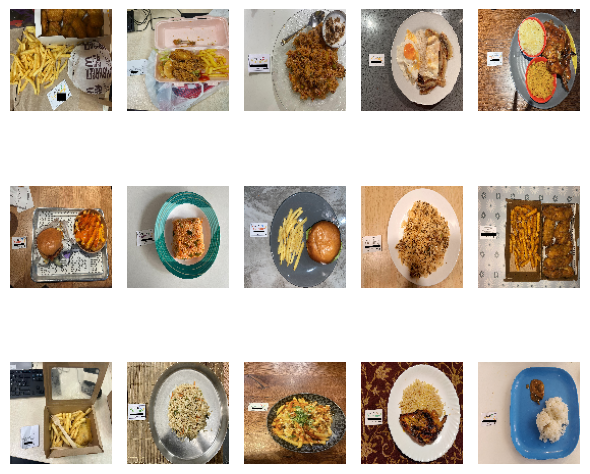

In [128]:
plt.figure(figsize=(6,6))
for k,I in enumerate(X_train_resized_rgb):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

# 5. Transformation Stage

The images are processed to extract five features: colorfulness, average color intensity and Hue saturation  value. I have selected this transformation because it presents the picture's attributes from various angles, including the amount of color, brightness, and average per color channel.Additionally, these features could help the model in predicting the dishes as rice or chips.

In [129]:
import cv2
import numpy as np

def calculate_colorfulness(I):
    hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    std_h = np.std(h)
    std_s = np.std(s)
    std_v = np.std(v)
    colorfulness = np.sqrt(std_h**2 + std_s**2 + std_v**2)
    return colorfulness

def calculate_average_color_intensity(I):
    hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
    mean_h = np.mean(hsv[:,:,0])
    mean_s = np.mean(hsv[:,:,1])
    mean_v = np.mean(hsv[:,:,2])
    return mean_h, mean_s, mean_v

def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx



In [130]:
X_train_f = []
for k, I in enumerate(X_train_resized_rgb):
  f1 = calculate_colorfulness(I)
  f2,f3,f4 = calculate_average_color_intensity(I)
  f5 = get_yellow_component(I)
  X_train_f.append([f1,f2,f3,f4,f5])

X_test_f = []
for k, I in enumerate(X_test_resized_rgb):
  f1 = calculate_colorfulness(I)
  f2,f3,f4 = calculate_average_color_intensity(I)
  f5 = get_yellow_component(I)
  X_test_f.append([f1,f2,f3,f4,f5])

In [131]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((70, 5), (29, 5))

# 6.Normalization

Because the feature extraction values were not in the same units, standardization was necessary to get them all into a similar range of values. As a result, values in X_train_f and X_test_f (or X_train_fn and X_test_fn) will be normalized.

In [132]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 7.Modelling

As they can solve binary classification problems, I have selected logistic regression, linear SVC, random forest, however, their accuracy will be evaluated in relation to this problem's context before I decide which model to use.

In [133]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_fn, Y_train)

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_fn, Y_train)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_fn, Y_train)


RandomForestClassifier(random_state=42)

# 8.Methodology

The five features from the resized images will be extracted and stored in the arrays X_train_f and X_test_f. Rather than an array of pixel values, these arrays will contain five single values, each of which represents a feature. Once the training and testing data (X_train_fn and X_test_fn) have been normalized, the model will make predictions for these sets of data. The mean of these predictions will be used to verify that the model is not overfitting or underfitting, and to assess its prediction accuracy. A confusion matrix is created to determine how well the model can predict whether the image depicts rice or chips in order to further validate its prediction.

# 9.Results
The Linear SVC model has the highest prediction accuracy as well as the highest true positive and true negative values, according to the confusion matrix and prediction accuracy.

In [134]:
def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [135]:
predictions_train_svm = svm_classifier.predict(X_train_fn)
predictions_test_svm = svm_classifier.predict(X_test_fn)

train_accuracy_svm = accuracy_score(Y_train, predictions_train_svm)
test_accuracy_svm = accuracy_score(Y_test, predictions_test_svm)

print(f"Training_Accuracy_SVM: {train_accuracy_svm}")
print(f"Test_Accuracy_SVM: {test_accuracy_svm}")

Training_Accuracy_SVM: 0.7857142857142857
Test_Accuracy_SVM: 0.6896551724137931


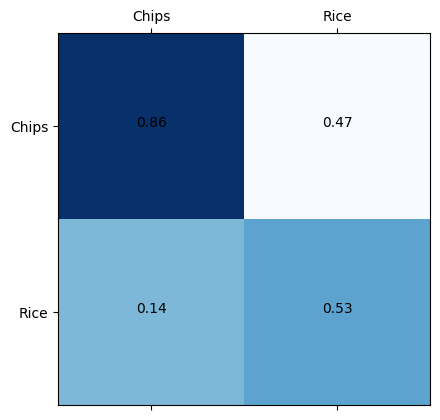

In [136]:
Ac = np.mean(predictions_test_svm[Y_test.astype(int)==0]==0)
Ar = np.mean(predictions_test_svm[Y_test.astype(int)==1]==1)

Mc = np.mean(predictions_test_svm[Y_test.astype(int)==0]==1)
Mr = np.mean(predictions_test_svm[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [137]:
predictions_train_lr = logistic_regression.predict(X_train_fn)
predictions_test_lr = logistic_regression.predict(X_test_fn)

train_accuracy_lr = accuracy_score(Y_train, predictions_train_lr)
test_accuracy_lr = accuracy_score(Y_test, predictions_test_lr)

print(f"Training Accuracy (Logistic Regression): {train_accuracy_lr}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy_lr}")


Training Accuracy (Logistic Regression): 0.6428571428571429
Test Accuracy (Logistic Regression): 0.7241379310344828


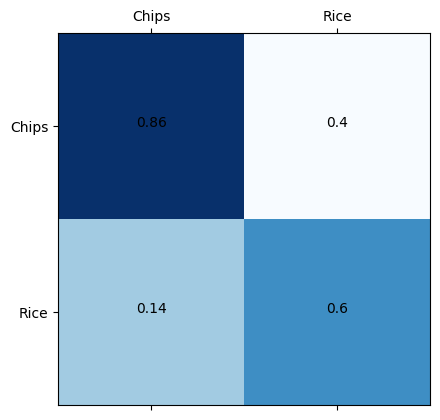

In [138]:
Ac = np.mean(predictions_test_lr[Y_test.astype(int)==0]==0)
Ar = np.mean(predictions_test_lr[Y_test.astype(int)==1]==1)

Mc = np.mean(predictions_test_lr[Y_test.astype(int)==0]==1)
Mr = np.mean(predictions_test_lr[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [139]:
predictions_train_rf = random_forest_classifier.predict(X_train_fn)
predictions_test_rf = random_forest_classifier.predict(X_test_fn)

train_accuracy_rf = accuracy_score(Y_train, predictions_train_rf)
test_accuracy_rf = accuracy_score(Y_test, predictions_test_rf)

print(f"Training Accuracy (Random Forest): {train_accuracy_rf}")
print(f"Test Accuracy (Random Forest): {test_accuracy_rf}")


Training Accuracy (Random Forest): 1.0
Test Accuracy (Random Forest): 0.5862068965517241


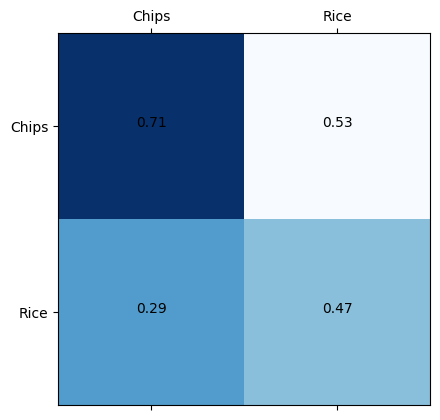

In [140]:
Ac = np.mean(predictions_test_rf[Y_test.astype(int)==0]==0)
Ar = np.mean(predictions_test_rf[Y_test.astype(int)==1]==1)

Mc = np.mean(predictions_test_rf[Y_test.astype(int)==0]==1)
Mr = np.mean(predictions_test_rf[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

# 10. Conclusion

This leads us to the conclusion that binary classification can be carried out using five distinct features that were taken from the images. Additional advancements could be achieved by employing trained models, like convolutional neural networks, on a larger dataset to extract more features for higher accuracy from the images.